In [17]:
import os
import json
import re

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from PIL import Image

from torchvision.datasets.folder import default_loader

In [2]:
%load_ext autoreload

In [3]:
%autoreload 2

In [29]:
from violet.utils.dataloaders import listfiles
from violet.utils.st import load_trained_st_regressor
from violet.utils.attention import plot_attention_rollup

In [5]:
img_dir = '/home/estorrs/violet/data/st/human_he_06252021/train/HT206B1_H8_U2/'
weights = '/home/estorrs/violet/sandbox/runs/test_run_brca_06242021/checkpoints/final.pt'
summary = '/home/estorrs/violet/sandbox/runs/test_run_brca_06242021/summary.json'

In [48]:
meta = json.load(open(summary))
regressor = load_trained_st_regressor(weights, meta)

In [7]:
fps = sorted(listfiles(img_dir, regex=r'.jpeg'))
fps[:5]

['/home/estorrs/violet/data/st/human_he_06252021/train/HT206B1_H8_U2/HT206B1_H8_U2_AAACAACGAATAGTTC-1.jpeg',
 '/home/estorrs/violet/data/st/human_he_06252021/train/HT206B1_H8_U2/HT206B1_H8_U2_AAACAAGTATCTCCCA-1.jpeg',
 '/home/estorrs/violet/data/st/human_he_06252021/train/HT206B1_H8_U2/HT206B1_H8_U2_AAACAATCTACTAGCA-1.jpeg',
 '/home/estorrs/violet/data/st/human_he_06252021/train/HT206B1_H8_U2/HT206B1_H8_U2_AAACACCAATAACTGC-1.jpeg',
 '/home/estorrs/violet/data/st/human_he_06252021/train/HT206B1_H8_U2/HT206B1_H8_U2_AAACAGAGCGACTCCT-1.jpeg']

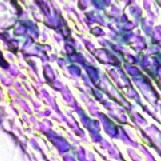

In [28]:
default_loader(fps[2])

(12, 197, 197)
(197, 197)
(196,)
(14, 14)


(<Figure size 360x216 with 3 Axes>,
 array([<AxesSubplot:ylabel='overlay'>, <AxesSubplot:ylabel='image'>,
        <AxesSubplot:ylabel='attention'>], dtype=object))

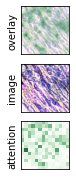

In [55]:
plot_attention_rollup(fps[2], regressor.vit)